In [2]:
# The code was removed by Watson Studio for sharing.

<h1> Finder Trial Tasks </h1>

By Catherine Choi

<h2> Part 1: Analyze this data: </h2>
        
Please analyze this data to see which of the variables in this data set correlate to other variables over time.

<h3> 1. Creating Dataframe </h3>

To begin, we load our data from <https://www.newyorkfed.org/medialibrary/interactives/householdcredit/data/xls/HHD_C_Report_2019Q3.xlsx>.
To see the data dictionary, go to <https://www.newyorkfed.org/medialibrary/interactives/householdcredit/data/pdf/data_dictionary_HHDC.pdf>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

excel_path = 'https://www.newyorkfed.org/medialibrary/interactives/householdcredit/data/xls/HHD_C_Report_2019Q3.xlsx'
xls = pd.ExcelFile(excel_path)

First, we want to see the sheet names.

In [6]:
xls.sheet_names

['TABLE OF CONTENTS',
 'Page 3 Data',
 'Page 4 Data',
 'Page 5 Data',
 'Page 6 Data',
 'Page 7 Data',
 'Page 8 Data',
 'Page 9 Data',
 'Page 10 Data',
 'Page 11 Data',
 'Page 12 Data',
 'Page 13 Data',
 'Page 14 Data',
 'Page 15 Data',
 'Page 16 Data',
 'Page 17 Data',
 'Page 18 Data',
 'Page 20 Data',
 'Page 21 Data',
 'Page 22 Data',
 'Page 23 Data',
 'Page 24 Data',
 'Page 25 Data',
 'Page 26 Data',
 'Page 27 Data',
 'Page 28 Data',
 'Page 29 Data',
 'Page 30 Data',
 'Page 32 Data',
 'Page 33 Data',
 'Page 34 Data',
 'Page 35 Data',
 'Page 36 Data',
 'Page 37 Data',
 'Page 38 Data',
 'Page 39 Data',
 'Page 40 Data',
 'Archive -->',
 'Page 16 Data_OLD']

Let's get the sheet 'Page 3 Data' and save this as a dataframe. We can skip the rows that do not contain data, add a suffix to each column to denote the tab origin, and set the Year:Quarter column as the index. Then, we can look at the first 10 rows of data to take a quick visual check.

In [7]:
df_pg3 = pd.read_excel(xls, sheet_name='Page 3 Data', usecols="A:H", skiprows=3, index_col=0)
df_pg3.columns = [str(col) + '_pg3' for col in df_pg3.columns]
df_pg3.index.name = 'Year:Quarter'
df_pg3.head(10)

,Mortgage_pg3,HE Revolving_pg3,Auto Loan_pg3,Credit Card_pg3,Student Loan_pg3,Other_pg3,Total_pg3
Year:Quarter,,,,,,,
03:Q1,4.942,0.242,0.641,0.688,0.2407,0.4776,7.2313
03:Q2,5.080,0.260,0.622,0.693,0.2429,0.4860,7.3839
03:Q3,5.183,0.269,0.684,0.693,0.2488,0.4773,7.5551
03:Q4,5.660,0.302,0.704,0.698,0.2529,0.4486,8.0655
04:Q1,5.840,0.328,0.720,0.695,0.2598,0.4465,8.2893
04:Q2,5.967,0.367,0.743,0.697,0.2629,0.4231,8.4600
04:Q3,6.210,0.426,0.751,0.706,0.3300,0.4100,8.8330
04:Q4,6.360,0.468,0.728,0.717,0.3457,0.4229,9.0416
05:Q1,6.512,0.502,0.725,0.710,0.3636,0.3941,9.2067


We can repeat this for all the National Chart sheets (pages 3-18), changing the columns selected for each sheet. Our goal here is to read each sheet in the Excel file to different dataframes, then join them on Year:Quarter as a key.

You can see below that sheet 'Page 4 Data' that the beginning values of the first column are not set properly as Year:Quarter, but instead show datetime. We need to set is to display as Year:Quarter so we can use it to match with the other dataframes.

In [9]:
df_pg4_original = pd.read_excel(xls, sheet_name='Page 4 Data', usecols="A:E", skiprows=3)
df_pg4_original = df_pg4_original.set_index(['Unnamed: 0'])
df_pg4_original.index.name = 'Year:Quarter'
df_pg4_original.head()

,Auto Loan,Credit Card,Mortgage,HE Revolving
Year:Quarter,,,,
2003-03-01 00:00:00,73.51,469.81,79.54,13.41
2003-06-01 00:00:00,70.76,468.94,79.73,14.22
2003-09-01 00:00:00,75.94,457.64,79.34,15.55
2003-12-01 00:00:00,77.64,452.71,83.42,16.10
2004-03-01 00:00:00,79.22,449.62,83.95,16.73


To remedy this, we will replace the incorrect values.

In [11]:
pd.options.mode.chained_assignment = None  # default='warn'

In [12]:
df_pg4 = pd.read_excel(xls, sheet_name='Page 4 Data', usecols="A:E", skiprows=3)
# Some values of the first column are not set properly as Year:Quarter. To remedy this, we will replace the incorrect values with those in a.
a = ["03:Q1","03:Q2","03:Q3","03:Q4","04:Q1","04:Q2","04:Q3","04:Q4","05:Q1","05:Q2","05:Q3","05:Q4","06:Q1","06:Q2","06:Q3","06:Q4","07:Q1","07:Q2","07:Q3","07:Q4","08:Q1","08:Q2","08:Q3","08:Q4","09:Q1","09:Q2","09:Q3","09:Q4","10:Q1","10:Q2","10:Q3","10:Q4","11:Q1"]
df_pg4['Unnamed: 0'].iloc[0:33] = a     
df_pg4.columns = [str(col) + '_pg4' for col in df_pg4.columns]
df_pg4 = df_pg4.set_index(['Unnamed: 0_pg4'])
df_pg4.index.name = 'Year:Quarter'
df_pg4.head()

,Auto Loan_pg4,Credit Card_pg4,Mortgage_pg4,HE Revolving_pg4
Year:Quarter,,,,
03:Q1,73.51,469.81,79.54,13.41
03:Q2,70.76,468.94,79.73,14.22
03:Q3,75.94,457.64,79.34,15.55
03:Q4,77.64,452.71,83.42,16.10
04:Q1,79.22,449.62,83.95,16.73


In [13]:
df_pg5 = pd.read_excel(xls, sheet_name='Page 5 Data', usecols="A:D", skiprows=3, index_col=0)
df_pg5.columns = [str(col) + '_pg5' for col in df_pg5.columns]
df_pg5.index.name = 'Year:Quarter'

df_pg6 = pd.read_excel(xls, sheet_name='Page 6 Data', usecols="A:H", skiprows=3, index_col=0)
# Drop N/A column
df_pg6 = df_pg6.drop(['Unnamed: 6'], axis=1)
df_pg6.columns = [str(col) + '_pg6' for col in df_pg6.columns]
df_pg6.index.name = 'Year:Quarter'

df_pg7 = pd.read_excel(xls, sheet_name='Page 7 Data', usecols="A:D", skiprows=3, index_col=0)
df_pg7.columns = [str(col) + '_pg7' for col in df_pg7.columns]
df_pg7.index.name = 'Year:Quarter'

df_pg8 = pd.read_excel(xls, sheet_name='Page 8 Data', usecols="A:H", skiprows=3, index_col=0)
# Drop N/A column
df_pg8 = df_pg8.drop(['Unnamed: 6'], axis=1)
df_pg8.columns = [str(col) + '_pg8' for col in df_pg8.columns]
df_pg8.index.name = 'Year:Quarter'

df_pg9 = pd.read_excel(xls, sheet_name='Page 9 Data', usecols="A:D", skiprows=3, index_col=0)
df_pg9.columns = [str(col) + '_pg9' for col in df_pg9.columns]
df_pg9.index.name = 'Year:Quarter'

In [14]:
df_pg8.head()

,<620_pg8,620-659_pg8,660-719_pg8,720-759_pg8,760+_pg8,TOTAL_pg8
Year:Quarter,,,,,,
04:Q1,31.94924,14.46022,27.04668,17.3,21.2,111.95614
04:Q2,26.80983,15.60173,32.25743,18.0,24.8,117.46899
04:Q3,30.31104,15.61396,27.13449,18.9,24.0,115.95949
04:Q4,30.04303,13.34953,26.42858,16.6,23.4,109.82114
05:Q1,27.47711,11.97451,22.97665,15.6,22.4,100.42827


We need to proceed different for sheet 'Page 10 Data' to remove NaN values and correctly align the last 3 columns

In [15]:
df_pg10_original = pd.read_excel(xls, sheet_name='Page 10 Data', usecols="A:G", skiprows=3, index_col=0)
df_pg10_original.columns = [str(col) + '_pg10' for col in df_pg10_original.columns]
df_pg10_original.index.name = 'Year:Quarter'
df_pg10_original.head(10)

,Credit Card Balance_pg10,Credit Card Available Credit_pg10,Credit Card Limit_pg10,HE Revolving Balance_pg10,HE Revolving Available Credit_pg10,HE Revolving Limit_pg10
Year:Quarter,,,,,,
03:Q1,0.688,1.862,2.55,NaN,NaN,NaN
NaN,NaN,NaN,NaN,0.242,0.240,0.482
03:Q2,0.693,1.867,2.56,NaN,NaN,NaN
NaN,NaN,NaN,NaN,0.260,0.260,0.520
03:Q3,0.693,1.857,2.55,NaN,NaN,NaN
NaN,NaN,NaN,NaN,0.269,0.287,0.556
03:Q4,0.698,1.872,2.57,NaN,NaN,NaN
NaN,NaN,NaN,NaN,0.302,0.297,0.599
04:Q1,0.695,1.875,2.57,NaN,NaN,NaN


In [16]:
df_pg10_original = xls.parse(sheet_name='Page 10 Data', usecols="A:D", skiprows=3,index_col=0)

# Since Sheet "Page 10 Data" has empty N/A cells, we will separate the columns A:D and E:G into separate dataframes, then slice and recombine.
df_pg10 = pd.read_excel(xls, sheet_name='Page 10 Data', usecols="A:D", skiprows=3,index_col=0)
df_pg10.index.name = 'Year:Quarter'
# Slicing to get every other row starting from row 1.
df_pg10 = df_pg10.iloc[0::2] 
df_pg10_b = pd.read_excel(xls, sheet_name='Page 10 Data', usecols="E:G", skiprows=3)
# Slicing to get every other row starting from row 2.
df_pg10_b = df_pg10_b.iloc[1::2]
# Adding columns E:G into our first dataframe
df_pg10['HE Revolving Balance'] = df_pg10_b['HE Revolving Balance'].values
df_pg10['HE Revolving Available Credit'] = df_pg10_b['HE Revolving Available Credit'].values
df_pg10['HE Revolving Limit'] = df_pg10_b['HE Revolving Limit'].values
df_pg10.columns = [str(col) + '_pg10' for col in df_pg10.columns]
# Peek at the first 10 columns to make sure this makes sense
df_pg10.head(10)

,Credit Card Balance_pg10,Credit Card Available Credit_pg10,Credit Card Limit_pg10,HE Revolving Balance_pg10,HE Revolving Available Credit_pg10,HE Revolving Limit_pg10
Year:Quarter,,,,,,
03:Q1,0.688,1.862,2.55,0.242,0.240,0.482
03:Q2,0.693,1.867,2.56,0.260,0.260,0.520
03:Q3,0.693,1.857,2.55,0.269,0.287,0.556
03:Q4,0.698,1.872,2.57,0.302,0.297,0.599
04:Q1,0.695,1.875,2.57,0.328,0.309,0.637
04:Q2,0.697,1.903,2.60,0.367,0.326,0.693
04:Q3,0.706,1.894,2.60,0.426,0.381,0.807
04:Q4,0.717,2.143,2.86,0.468,0.405,0.873
05:Q1,0.710,2.180,2.89,0.502,0.437,0.939


In [20]:
df_pg11 = pd.read_excel(xls, sheet_name='Page 11 Data', usecols="A:H", skiprows=3, index_col=0)
df_pg11.columns = [str(col) + '_pg11' for col in df_pg11.columns]
df_pg11.index.name = 'Year:Quarter'

# Similarly to sheet 'Page 4 Data', the beginning values of the first column are not set properly as Year:Quarter, but instead show datetime
df_pg12 = pd.read_excel(xls, sheet_name='Page 12 Data', usecols="A:H", skiprows=3)
# Some values of the first column are not set properly as Year:Quarter. To remedy this, we will replace the incorrect values with those in x.
x = ["03:Q1","03:Q2","03:Q3","03:Q4","04:Q1","04:Q2","04:Q3","04:Q4","05:Q1","05:Q2","05:Q3","05:Q4","06:Q1","06:Q2","06:Q3","06:Q4","07:Q1","07:Q2","07:Q3","07:Q4","08:Q1","08:Q2","08:Q3","08:Q4","09:Q1","09:Q2","09:Q3","09:Q4","10:Q1","10:Q2","10:Q3","10:Q4"]
df_pg12['Unnamed: 0'].iloc[0:32] = x     
df_pg12.columns = [str(col) + '_pg12' for col in df_pg12.columns]
df_pg12 = df_pg12.set_index(['Unnamed: 0_pg12'])
df_pg12.index.name = 'Year:Quarter'

# This sheet has both New Delinquent* Balances by Loan Type as percent values and dollar values. We have only selected the percentages.
df_pg13 = pd.read_excel(xls, sheet_name='Page 13 Data', usecols="A:H", skiprows=4, index_col=0)
df_pg13.columns = [str(col) + '_pg13' for col in df_pg13.columns]
df_pg13.index.name = 'Year:Quarter'

# This sheet has both New Seriously Delinquent* Balances by Loan Type as percent values and dollar values. We have only selected the percentages.
df_pg14 = pd.read_excel(xls, sheet_name='Page 14 Data', usecols="A:H", skiprows=4, index_col=0)
df_pg14.columns = [str(col) + '_pg14' for col in df_pg14.columns]
df_pg14.index.name = 'Year:Quarter'

df_pg15 = pd.read_excel(xls, sheet_name='Page 15 Data', usecols="A:C", skiprows=3, index_col=0)
df_pg15.columns = [str(col) + '_pg15' for col in df_pg15.columns]
df_pg15.index.name = 'Year:Quarter'

df_pg16 = pd.read_excel(xls, sheet_name='Page 16 Data', usecols="A:C", skiprows=3, index_col=0)
df_pg16.columns = [str(col) + '_pg16' for col in df_pg16.columns]
df_pg16.index.name = 'Year:Quarter'

df_pg17 = pd.read_excel(xls, sheet_name='Page 17 Data', usecols="A:C", skiprows=3, index_col=0)
df_pg17.columns = [str(col) + '_pg17' for col in df_pg17.columns]
df_pg17.index.name = 'Year:Quarter'

df_pg18 = pd.read_excel(xls, sheet_name='Page 18 Data', usecols="A:C", skiprows=3, index_col=0)
df_pg18.columns = [str(col) + '_pg18' for col in df_pg18.columns]
df_pg18.index.name = 'Year:Quarter'


Now lets inner join all these dataframes together on the Year:Quarter column.

In [129]:
from functools import reduce

data_frames = [df_pg3, df_pg4, df_pg5, df_pg6, df_pg7, df_pg8, df_pg9, df_pg10, df_pg11, df_pg12, df_pg13, df_pg14, df_pg15, df_pg16, df_pg17, df_pg18]
df_national_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Year:Quarter'], how='inner'), data_frames)
df_national_merged.head(10)

project.save_data(data=df_national_merged.to_csv(index=False),file_name='National_merged.csv',overwrite=True)


{'file_name': 'National_merged.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'findertrialtasks-donotdelete-pr-qjabqb2jwgevga',
 'asset_id': '4fa28769-c0b1-4298-a06d-739368e2bf66'}

Now we have our dataframe! Let's just set the Year:Quarter index back as column and make sure it registers as datetime. Then we can get info our dataframe.

In [130]:
df_national_merged.shape

# Setting Year:Quarter index back as column
new_col = df_national_merged.index
df_national_merged.insert(loc=0, column='Year:Quarter_', value=new_col)

# Converting 'Year:Quarter_' column from string to datetime
u = df_national_merged['Year:Quarter_'].str.replace(r'(\d+):(Q\d)', r'20\1-\2')
df_national_merged['Year:Quarter_'] = pd.to_datetime(u)

# Check data types to confirm change. 'Year:Quarter_' is shown as 63 non-null datetime64[ns]
df_national_merged.info()


<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 04:Q1 to 19:Q3
Data columns (total 75 columns):
Year:Quarter_                                          63 non-null datetime64[ns]
Mortgage_pg3                                           63 non-null float64
HE Revolving_pg3                                       63 non-null float64
Auto Loan_pg3                                          63 non-null float64
Credit Card_pg3                                        63 non-null float64
Student Loan_pg3                                       63 non-null float64
Other_pg3                                              63 non-null float64
Total_pg3                                              63 non-null float64
Auto Loan_pg4                                          63 non-null float64
Credit Card_pg4                                        63 non-null float64
Mortgage_pg4                                           63 non-null float64
HE Revolving_pg4                                       63 non-n

<h3> 2. Descriptive Statistics </h3>

Let's look at the first 5 rows of our master dataframe.

In [132]:
df_national_merged.head()

,Year:Quarter_,Mortgage_pg3,HE Revolving_pg3,Auto Loan_pg3,Credit Card_pg3,Student Loan_pg3,Other_pg3,Total_pg3,Auto Loan_pg4,Credit Card_pg4,...,OTHER_pg14,ALL_pg14,To 30-60 days late_pg15,To 90+ days late_pg15,To current_pg16,To 90+ days late_pg16,foreclosure_pg17,bankruptcy_pg17,proportion of consumers with collection_pg18,average collection amount per person with item_pg18
Year:Quarter,,,,,,,,,,,,,,,,,,,,,
04:Q1,2004-01-01,5.840,0.328,0.720,0.695,0.2598,0.4465,8.2893,79.22,449.62,...,4.982944,2.268440,1.32,0.18,48.09,12.93,186.06,534.90,10.55,1011.78
04:Q2,2004-04-01,5.967,0.367,0.743,0.697,0.2629,0.4231,8.4600,80.73,458.26,...,5.164475,2.152628,1.34,0.15,47.88,11.16,171.44,579.32,11.71,1046.00
04:Q3,2004-07-01,6.210,0.426,0.751,0.706,0.3300,0.4100,8.8330,81.70,447.07,...,4.956327,2.131760,1.35,0.14,40.37,16.55,168.80,530.52,11.80,1059.55
04:Q4,2004-10-01,6.360,0.468,0.728,0.717,0.3457,0.4229,9.0416,78.48,448.43,...,4.797545,2.108842,1.31,0.20,41.41,16.33,184.14,572.92,12.20,1068.27
05:Q1,2005-01-01,6.512,0.502,0.725,0.710,0.3636,0.3941,9.2067,78.50,451.95,...,4.430852,2.071914,1.19,0.10,43.14,13.34,171.52,462.08,12.35,1059.14


Here are some basic descriptive statistics for our dataset.

In [24]:
df_national_merged.describe()

,Mortgage_pg3,HE Revolving_pg3,Auto Loan_pg3,Credit Card_pg3,Student Loan_pg3,Other_pg3,Total_pg3,Auto Loan_pg4,Credit Card_pg4,Mortgage_pg4,...,OTHER_pg14,ALL_pg14,To 30-60 days late_pg15,To 90+ days late_pg15,To current_pg16,To 90+ days late_pg16,foreclosure_pg17,bankruptcy_pg17,proportion of consumers with collection_pg18,average collection amount per person with item_pg18
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,8.283460,0.549157,0.899721,0.752227,0.891669,0.373194,11.749428,90.784444,434.074286,86.107460,...,4.841787,3.563608,1.449049,0.296635,33.756855,22.246813,220.523492,358.207302,12.788889,1334.450952
std,0.851111,0.100460,0.194547,0.065898,0.375092,0.040983,1.261572,11.570192,36.900012,6.058948,...,1.189531,1.764115,0.587037,0.182966,7.302996,9.214779,143.603188,152.177347,1.537154,130.645186
min,5.840000,0.328000,0.702200,0.659000,0.259800,0.296000,8.289300,78.480000,377.900000,79.350000,...,3.553682,1.894787,0.710000,0.090000,20.470000,10.440000,64.360000,186.120000,8.970000,1011.780000
25%,8.047000,0.472500,0.746500,0.696700,0.563350,0.332650,11.327150,82.065000,396.640000,80.745000,...,4.018002,2.326180,0.960000,0.157321,28.250000,15.050000,95.980000,225.380000,12.365000,1308.565000
50%,8.369000,0.540000,0.810000,0.733000,0.873600,0.381500,11.849800,86.200000,445.040000,84.870000,...,4.461828,2.628922,1.320000,0.220000,34.700000,18.400000,172.860000,326.860000,12.880000,1350.420000
75%,8.903500,0.629050,1.054500,0.813500,1.217500,0.408300,12.533050,99.395000,463.160000,90.860000,...,5.027291,4.638873,1.790000,0.430000,38.396604,27.945000,290.400000,447.840000,13.950000,1418.735000
max,9.437000,0.714000,1.315000,0.881000,1.498000,0.446500,13.952000,114.870000,496.120000,98.140000,...,8.083967,7.928456,3.050000,0.750000,50.120000,44.230000,566.180000,948.620000,14.640000,1549.970000


<h3> 3. Correlation Statistics </h3>

Here is our Pearson correlation matrix.

In [25]:
df_national_merged.corr()

,Mortgage_pg3,HE Revolving_pg3,Auto Loan_pg3,Credit Card_pg3,Student Loan_pg3,Other_pg3,Total_pg3,Auto Loan_pg4,Credit Card_pg4,Mortgage_pg4,...,OTHER_pg14,ALL_pg14,To 30-60 days late_pg15,To 90+ days late_pg15,To current_pg16,To 90+ days late_pg16,foreclosure_pg17,bankruptcy_pg17,proportion of consumers with collection_pg18,average collection amount per person with item_pg18
Mortgage_pg3,1.000000,0.335619,0.403032,0.658842,0.531236,-0.050444,0.954244,0.477013,0.145963,0.200056,...,0.327961,0.420759,0.247710,0.395132,-0.591142,0.447024,0.258004,-0.474659,-0.101874,0.620262
HE Revolving_pg3,0.335619,1.000000,-0.684964,0.061243,-0.460145,-0.131806,0.062532,-0.623987,-0.367518,0.811724,...,0.539684,0.804296,0.864757,0.837570,-0.661837,0.866135,0.886063,0.361754,0.652968,0.171033
Auto Loan_pg3,0.403032,-0.684964,1.000000,0.447261,0.830662,0.129131,0.646100,0.993299,0.509225,-0.641557,...,-0.304298,-0.513088,-0.680443,-0.572790,0.238179,-0.541136,-0.706198,-0.687309,-0.685684,0.218716
Credit Card_pg3,0.658842,0.061243,0.447261,1.000000,0.156201,0.666065,0.638647,0.527848,0.720212,0.331126,...,0.396305,0.161650,0.255301,0.164345,-0.173669,0.202245,0.175337,-0.214266,-0.614866,-0.067403
Student Loan_pg3,0.531236,-0.460145,0.830662,0.156201,1.000000,-0.399157,0.742363,0.818158,-0.005997,-0.719511,...,-0.191988,-0.197448,-0.579880,-0.286669,-0.108252,-0.272190,-0.531560,-0.685515,-0.275771,0.663373
Other_pg3,-0.050444,-0.131806,0.129131,0.666065,-0.399157,1.000000,-0.076014,0.172088,0.827732,0.394998,...,0.149808,-0.208086,0.148329,-0.157132,0.363739,-0.143685,0.028198,0.100594,-0.658777,-0.720789
Total_pg3,0.954244,0.062532,0.646100,0.638647,0.742363,-0.076014,1.000000,0.701720,0.210462,-0.083127,...,0.185792,0.211764,-0.023210,0.163187,-0.444224,0.212073,-0.012253,-0.609152,-0.257982,0.636102
Auto Loan_pg4,0.477013,-0.623987,0.993299,0.527848,0.818158,0.172088,0.701720,1.000000,0.536332,-0.566774,...,-0.227487,-0.443251,-0.606365,-0.503175,0.185678,-0.468746,-0.632347,-0.688530,-0.696113,0.220491
Credit Card_pg4,0.145963,-0.367518,0.509225,0.720212,-0.005997,0.827732,0.210462,0.536332,1.000000,0.112566,...,-0.169148,-0.462956,-0.171030,-0.407703,0.396380,-0.353841,-0.300079,-0.262223,-0.774362,-0.458344
Mortgage_pg4,0.200056,0.811724,-0.641557,0.331126,-0.719511,0.394998,-0.083127,-0.566774,0.112566,1.000000,...,0.479994,0.577205,0.874808,0.660200,-0.375446,0.696833,0.830080,0.385116,0.273616,-0.252124


Here is a snippet of our correlatiobn matrix (only first 20 fields) as heatmap where red is a strong positive correlation, blue is a strong negative correlation, and white is a weak correlation.

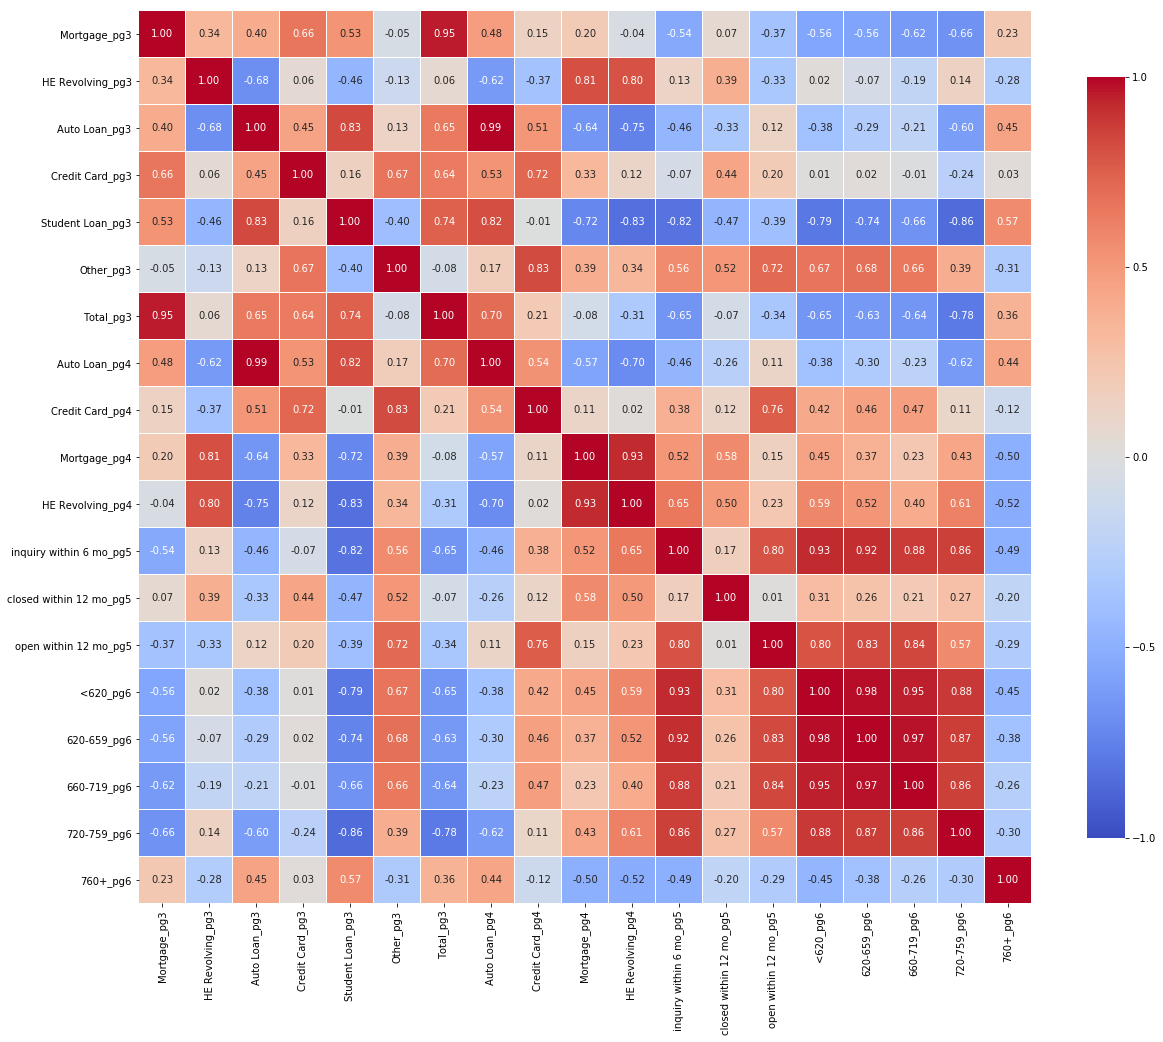

In [26]:

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmin= -1.0, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70, 'ticks': [-1.0, -0.5, 0, 0.5, 01.0]}, cmap="coolwarm")
    plt.show();
    
correlation_heatmap(df_national_merged[df_national_merged.columns[range(20)]])

This is our entire correlation matrix as heatmap:

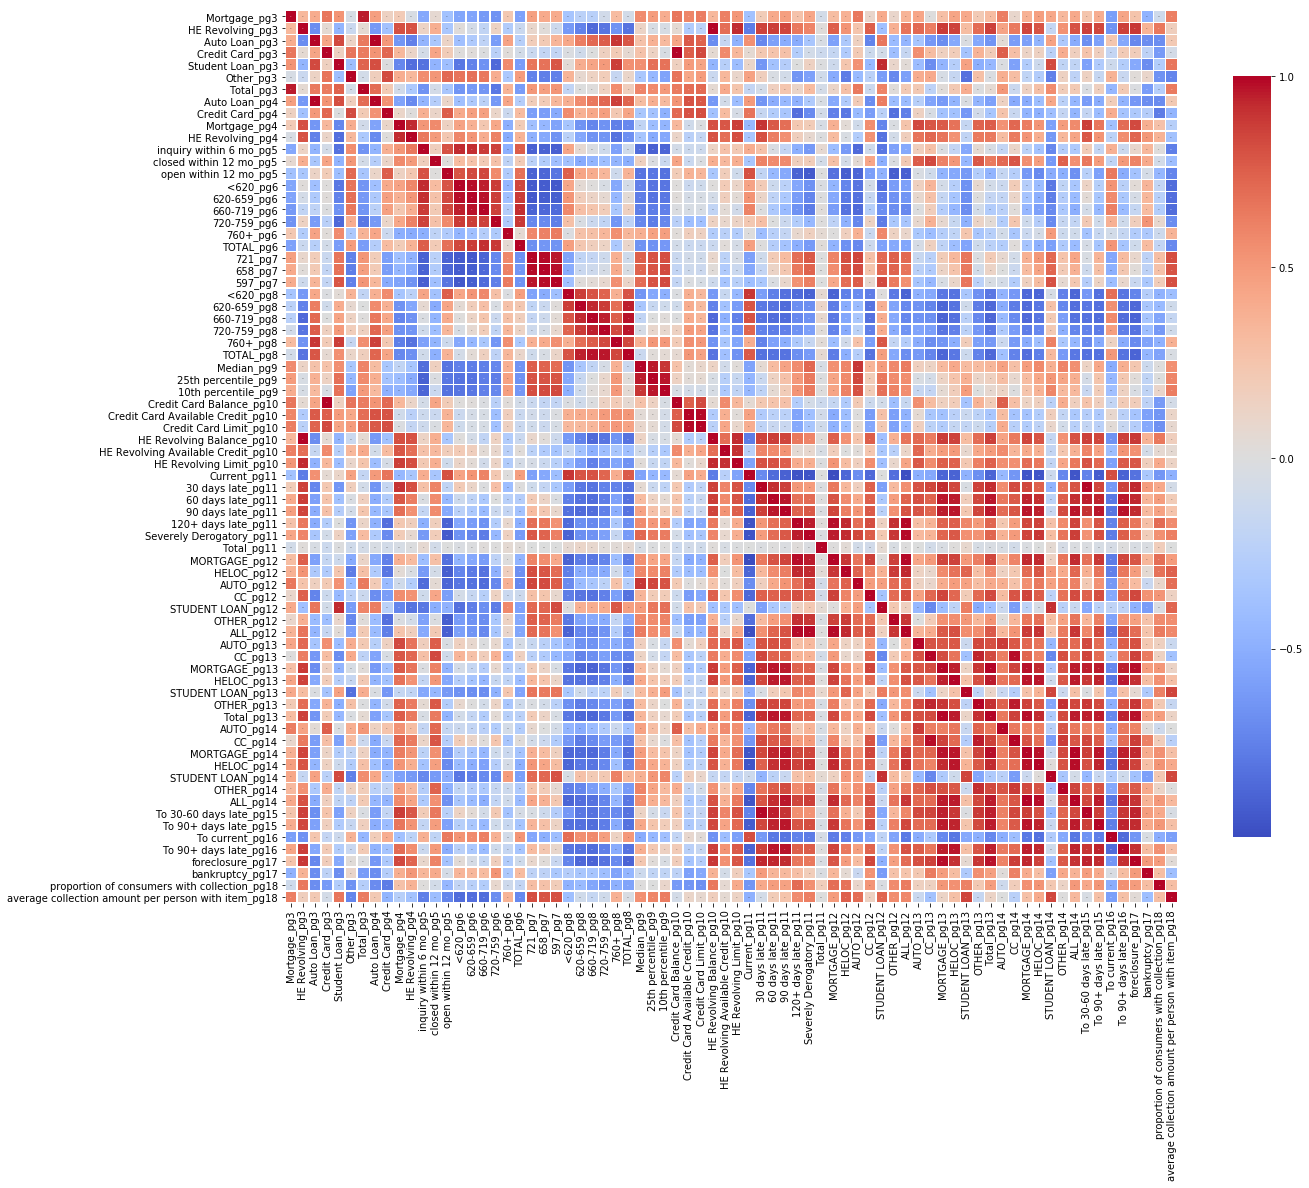

In [29]:
def correlation_heatmap_no_ft(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70, 'ticks': [-1.0, -0.5, 0, 0.5, 01.0]}, cmap="coolwarm", annot_kws={"size": 0})
    plt.show();
    
correlation_heatmap_no_ft(df_national_merged)


Now, let's find the strongest correlations!

cortest = df_national_merged.corr()
cortest['HE Revolving Balance_pg10']

Here is a list of the ordered correlation pairs, removing the duplicate pairs and the self-correlations. Note that this is to show strength of the correlation (negative and positive), so all values are absolute.

In [95]:
corrs = df_national_merged.corr()
corrs.loc[:,:] = np.tril(corrs.values, k=-1) 
corrs = corrs.abs().unstack()
corrs = corrs[corrs>0]
corrs_desc = corrs.sort_values(ascending=False)
corrs_desc

HE Revolving_pg3                    HE Revolving Balance_pg10                              0.999990
Credit Card_pg3                     Credit Card Balance_pg10                               0.999953
MORTGAGE_pg13                       Total_pg13                                             0.997831
MORTGAGE_pg14                       ALL_pg14                                               0.995008
Auto Loan_pg3                       Auto Loan_pg4                                          0.993299
Current_pg11                        MORTGAGE_pg12                                          0.992649
Credit Card Available Credit_pg10   Credit Card Limit_pg10                                 0.991968
721_pg7                             658_pg7                                                0.991376
120+ days late_pg11                 ALL_pg12                                               0.988461
MORTGAGE_pg12                       ALL_pg12                                               0.987863


We can see this list has length 2701. This makes sense since 74 Choose 2 is 2701. In other words, there are 2701 ways to choose 2 combinations of the 74 fields when order doesn't matter.

We can see the top 10 strongest correlation pairs are follows:

In [96]:
corrs_desc.head(10)

HE Revolving_pg3                   HE Revolving Balance_pg10    0.999990
Credit Card_pg3                    Credit Card Balance_pg10     0.999953
MORTGAGE_pg13                      Total_pg13                   0.997831
MORTGAGE_pg14                      ALL_pg14                     0.995008
Auto Loan_pg3                      Auto Loan_pg4                0.993299
Current_pg11                       MORTGAGE_pg12                0.992649
Credit Card Available Credit_pg10  Credit Card Limit_pg10       0.991968
721_pg7                            658_pg7                      0.991376
120+ days late_pg11                ALL_pg12                     0.988461
MORTGAGE_pg12                      ALL_pg12                     0.987863
dtype: float64

We can see the top 10 weakest correlation pairs are follows:

In [97]:
corrs_desc.tail(10)

Total_pg11                          AUTO_pg13              0.001654
Current_pg11                        STUDENT LOAN_pg12      0.001373
658_pg7                             AUTO_pg14              0.000948
OTHER_pg12                          AUTO_pg13              0.000638
Current_pg11                        Total_pg11             0.000392
Total_pg3                           620-659_pg8            0.000367
HE Revolving Available Credit_pg10  HELOC_pg12             0.000278
Student Loan_pg3                    120+ days late_pg11    0.000163
660-719_pg8                         25th percentile_pg9    0.000154
10th percentile_pg9                 OTHER_pg13             0.000149
dtype: float64

Our ultimate goal will determine our next steps. For instance, if we were calculating correlation in order to create a regression model, we want to remove multicollinear variables to prevent overfitting. We can sort our table to only show correlation pairs with correlation coefficient under .7 (as multicollinearity is likely at a correlation coefficient of .7 or higher) and above 0.5.  We can see this as follows:

In [98]:

corr_remove_multi = corrs_desc[corrs_desc < .7]
strong_corr = corr_remove_multi[corr_remove_multi > .5]
strong_corr

HE Revolving_pg3           OTHER_pg13                                             0.699969
Auto Loan_pg4              HE Revolving_pg4                                       0.699021
760+_pg8                   foreclosure_pg17                                       0.698326
HE Revolving Limit_pg10    MORTGAGE_pg14                                          0.697916
720-759_pg6                658_pg7                                                0.697404
Mortgage_pg4               To 90+ days late_pg16                                  0.696833
Auto Loan_pg4              proportion of consumers with collection_pg18           0.696113
120+ days late_pg11        AUTO_pg12                                              0.695874
Mortgage_pg4               90 days late_pg11                                      0.695409
620-659_pg8                760+_pg8                                               0.694767
<620_pg8                   AUTO_pg12                                              0.694252

Just taking a quick glance, here are a few findings:
*  Auto Loan_pg4 and HE Revolving_pg4 are strongly negatively correlated with a correlation coefficient of -0.699021. This means as the Number of Auto Loans Accounts increases, the Number of Home Equity Revolving Accounts decreases.
*  760+_pg8 and foreclosure_pg17 are strongly negatively correlated with a correlation coefficient of 0.698326. This means as the Auto Loan Origination Volume of Riskscores 760+ increases, the Number of Consumers with New Foreclosures decreases.
*  HE Revolving Limit_pg10 and MORTGAGE_pg14 are strongly positively correlated with a correlation coefficient of 0.697916. This means as Home Equity Line of Credit increases, the New Seriously Delinquent Mortgage Balances increase.

We can look at these correlation with scatterplots.

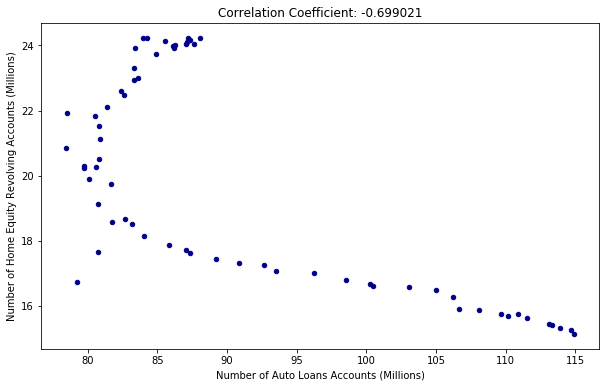

In [120]:
df_national_merged.plot(kind='scatter', x='Auto Loan_pg4', y='HE Revolving_pg4', figsize=(10, 6), color='darkblue')

plt.xlabel('Number of Auto Loans Accounts (Millions)')
plt.ylabel('Number of Home Equity Revolving Accounts (Millions)')
plt.title('Correlation Coefficient: -0.699021')

plt.show()

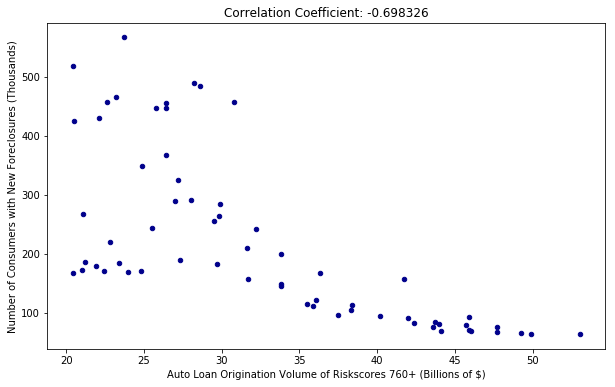

In [122]:
df_national_merged.plot(kind='scatter', x='760+_pg8', y='foreclosure_pg17', figsize=(10, 6), color='darkblue')

plt.xlabel('Auto Loan Origination Volume of Riskscores 760+ (Billions of $)')
plt.ylabel('Number of Consumers with New Foreclosures (Thousands)')
plt.title('Correlation Coefficient: -0.698326')

plt.show()

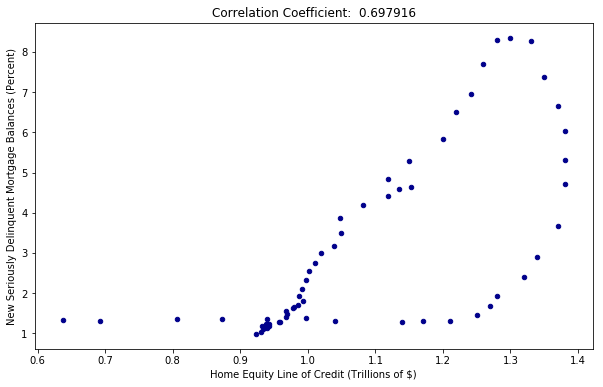

In [123]:
df_national_merged.plot(kind='scatter', x='HE Revolving Limit_pg10', y='MORTGAGE_pg14', figsize=(10, 6), color='darkblue')

plt.xlabel('Home Equity Line of Credit (Trillions of $)')
plt.ylabel('New Seriously Delinquent Mortgage Balances (Percent)')
plt.title('Correlation Coefficient:  0.697916')

plt.show()

We can do this for all the pairs we are interested in.

<h3> 4. Further analysis </h3>

If I want to take it a step further, I can calculate the p-values for pairwise correlation of columns (where the hypothesis test whose null hypothesis is an absence of association) to find which correlations are statistically significant. I would also remove columns with very high correlation with another column, since this would indicate multicollinearity and would cause our model to be overfit.

I only created a dataframe and correlation matrix for National Chart Data. In further analysis, I would also examine the Data by Age and Data by State. I could also create a cholorpleth map to visualize the data by state.


<h2> Part 2: Pull a headline out of this data set: </h2>

https://www.bls.gov/news.release/ecec.t02.htm


See the following google sheet link to see the data set/charts: <https://docs.google.com/spreadsheets/d/1cI3-xblEG2w4BWEvJ05unxsghjC_0M55pqPHq97E3n0/edit?usp=sharing>


<h3> Headlines </h3>

1. Management/Business/Financial Employers spend more than 3 times on Compensation than Service Employers (\\$68.28 and \$19.75 respectively).
2. For every increase of \\$10.00 in Wages and salaries Compensation, Total benefits increases by about \$4.87 across occupational groups
3. Healthcare and Social Assistance Industry Compensates Employees the least, compared to other Industry Groups.
4. Total Benefits Account for 31.3% of Total Compensation by Employers for Civilian Workers